In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# recall the stored dataset for analysis
%store -r df_twitter_clean
%store -r df_image_pred_clean
%store -r df_tweet_info

### 5.  Assess df_tweet_info

In [3]:
df_tweet_info.head()

,id,favorite_count,retweet_count
0,892420643555336193,38013,8314
1,892177421306343426,32631,6141
2,891815181378084864,24559,4066
3,891689557279858688,41363,8458
4,891327558926688256,39542,9158


### 5.1 Summary of Visual Assessment


Three columns in the dataframe and the id column header is diffrent than the other two dataframes

### 5.2  Programmatic Assessment

In [4]:
#number of rows and columns in the dataframe
df_tweet_info.shape

(2340, 3)

In [5]:
#summary information of the dataframe
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
favorite_count    2340 non-null int64
retweet_count     2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [6]:
# find duplicate rows
df_tweet_info[df_tweet_info.duplicated()]

,id,favorite_count,retweet_count


In [7]:
# Checking for the duplicate- should return False 
df_tweet_info.duplicated().any()

False

In [8]:
#Number of null values
df_tweet_info.isnull().sum()

id                0
favorite_count    0
retweet_count     0
dtype: int64

### 5.3 Summary of Programmatic Assessment


- 1. There is no null value

- 2. There is no duplicate value 

- 3. The dataframe columns have integer values

### 5.4  Define, Code and Test

### 5.4.1 Define Quality issues in df_image_pred dataframe

### Quality Issue 1: 

**Define Quality Issue 1: Rename 'id' to 'tweet_id' in the df_tweet_info dataframe usin the rename function.**

**Code**

In [9]:
#rename the column id into tweet_id
df_tweet_info = df_tweet_info.rename(columns = {'id':'tweet_id'})

Ref:https://stackoverflow.com/questions/20868394/changing-a-specific-column-name-in-pandas-dataframe

**Test**

In [10]:
#checking ig the id has been changed to tweet_id in the df_tweet_info dataframe 
df_tweet_info.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38013,8314
1,892177421306343426,32631,6141
2,891815181378084864,24559,4066
3,891689557279858688,41363,8458
4,891327558926688256,39542,9158


### 6. Combine all the dataframes based on the common tweet_id

In [11]:
#number of common tweet_id among the three dataframes
from functools import reduce
len(reduce(np.intersect1d, (df_twitter_clean['tweet_id'], df_image_pred_clean['tweet_id'],df_tweet_info['tweet_id'])))

1958

In [12]:
#number of rows in the merged dataframe columns- subtructing 3 from the toal as the tweet_id column is the common
df_twitter_clean.shape[1]+df_image_pred_clean.shape[1]+df_tweet_info.shape[1]-3 

19

**Note: The merge dataframe should have 1958 rows and 19 columns.**

In [13]:
#list of the dataframes
df_dataframes = [df_twitter_clean, df_image_pred_clean, df_tweet_info]

In [14]:
df1 = pd.merge(df_twitter_clean, df_image_pred_clean, how='inner', on=['tweet_id'])

In [15]:
df_master = pd.merge(df1, df_tweet_info, how='inner', on=['tweet_id'])

In [16]:
df_master.head()

,tweet_id,rating_numerator,rating_denominator,name,year,day,month,hour,stages,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,13,10,Phineas,2017,Tue,Aug,16,None,Orange,0.097049,False,Bagel,0.085851,False,Bagel,0.076110,False,38013,8314
1,892177421306343426,13,10,Tilly,2017,Tue,Aug,0,None,Chihuahua,0.323581,True,Pekinese,0.090647,True,Pekinese,0.068957,True,32631,6141
2,891815181378084864,12,10,Archie,2017,Mon,Jul,0,None,Chihuahua,0.716012,True,Malamute,0.078253,True,Malamute,0.031379,True,24559,4066
3,891689557279858688,13,10,Darla,2017,Sun,Jul,15,None,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Labrador retriever,0.040836,False,41363,8458
4,891327558926688256,12,10,Franklin,2017,Sat,Jul,16,None,Basset,0.555712,True,English springer,0.225770,True,English springer,0.175219,True,39542,9158


In [17]:
#should return 1958 rows
df_master.shape

(1958, 20)

### 7. Vizualizations

**Vizualizations will be based on the cleaned dataset df_master. The cleaned data has been saved in the csv format with a file name- 'df_master_clean.csv'.**

**In the vizualization part we will focus on the following aspects:**

1. Most frequent dog genres predicted by the algorithm

2. Most freuqunet dog stages

3. Time- Year, Month and hour of tweeting

In [18]:
#Colors that will be used throughout the analysis- taken from ref 5 accessed during Jan-2019
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

### 7.1  Most frequent dog genres predicted by the algorithm


In [19]:
most_common_p1 = df_master.p1.value_counts().rename_axis('dog_genre').reset_index(name='number').head(10)
most_common_p1

,dog_genre,number
0,Golden retriever,131
1,Labrador retriever,91
2,Pembroke,88
3,Chihuahua,79
4,Pug,54
5,Chow,41
6,Samoyed,39
7,Toy poodle,38
8,Pomeranian,37
9,Malamute,29


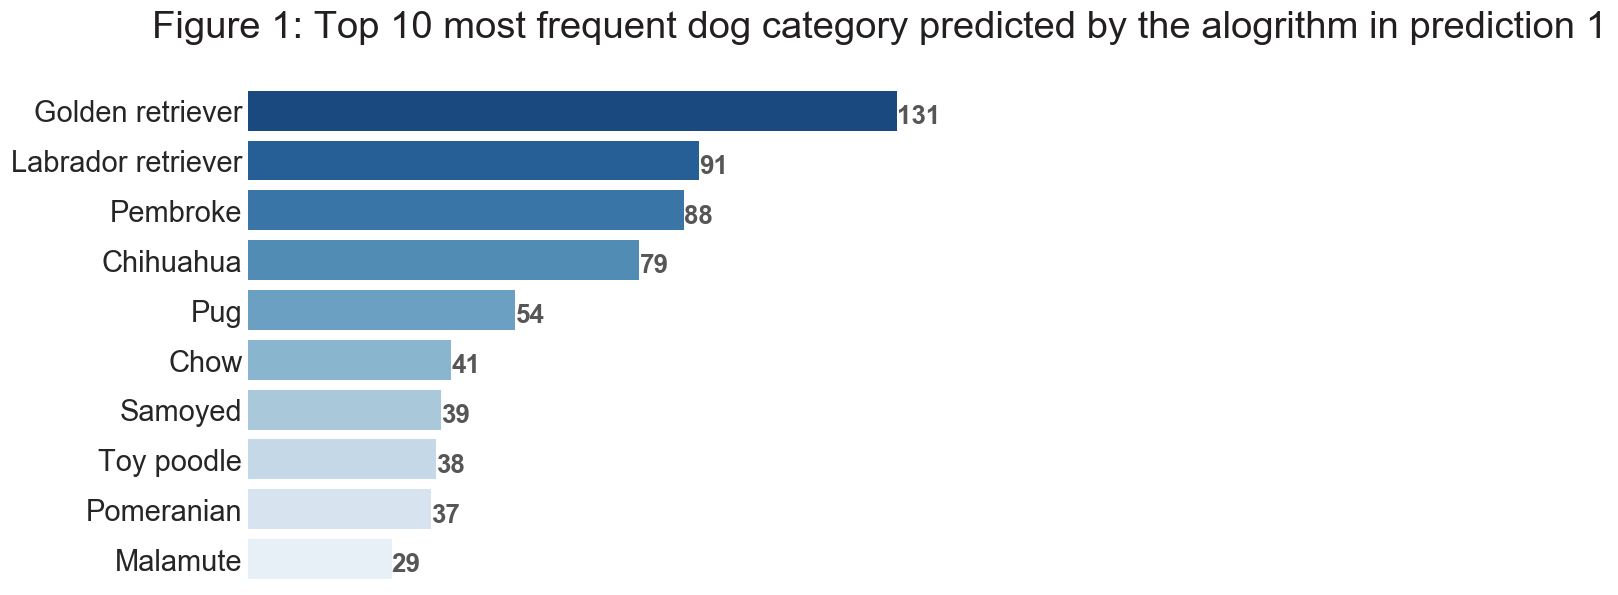

In [20]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = [8, 6], dpi=110)
data = most_common_p1    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = most_common_p1.index   
sns.barplot(x= most_common_p1['number'], y= most_common_p1['dog_genre'], data= most_common_p1, palette=np.array(pal[::-1])[rank])

#lables-empty
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize=19)
plt.title('Figure 1: Top 10 most frequent dog category predicted by the alogrithm in prediction 1\n',fontsize=25,loc="left", color = GRAY1, x=-0.14)

#remove borders
sns.despine(bottom=True, left=True, top=True)


#title
for i, v in enumerate(most_common_p1['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 17, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#plt.savefig('most_freq_1.png')
sns.despine(bottom=True, left=True)
plt.show()

In [21]:
most_common_p2 = df_master.p2.value_counts().rename_axis('dog_genre').reset_index(name='number').head(10)
most_common_p2

,dog_genre,number
0,Labrador retriever,91
1,Golden retriever,80
2,Cardigan,73
3,Chihuahua,41
4,Chesapeake bay retriever,40
5,Pomeranian,39
6,French bulldog,39
7,Toy poodle,35
8,Siberian husky,33
9,Miniature poodle,32


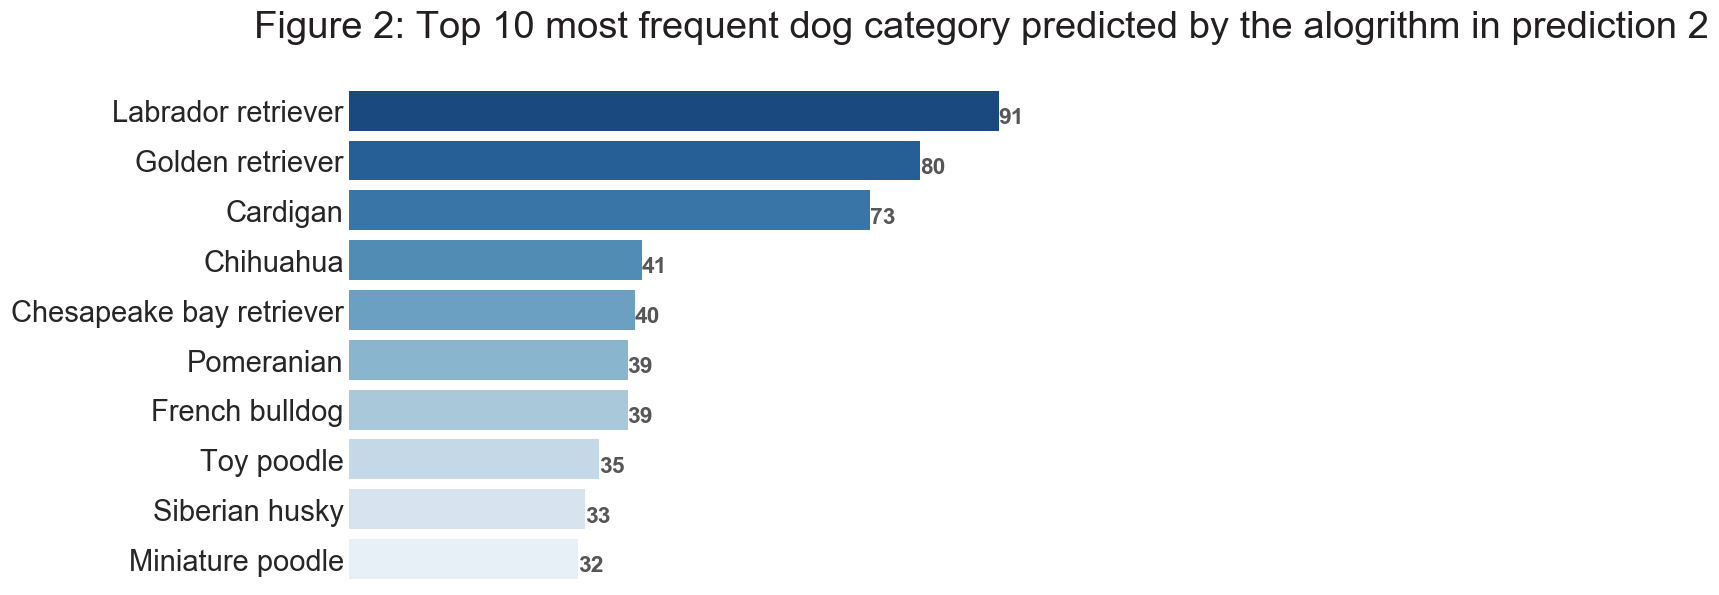

In [22]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [8,6], dpi=110)
data = most_common_p2    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = most_common_p2.index   
sns.barplot(x= most_common_p2['number'], y= most_common_p2['dog_genre'], data= most_common_p2, palette=np.array(pal[::-1])[rank])

#lables-empty
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize=19)
plt.title('Figure 2: Top 10 most frequent dog category predicted by the alogrithm in prediction 2\n',fontsize=25,loc="left", color = GRAY1, x=-0.14)

#remove borders
sns.despine(bottom=True, left=True, top=True)


#title
for i, v in enumerate(most_common_p2['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.savefig('Figure_2.png', format='png')
sns.despine(bottom=True, left=True)
plt.show()

In [23]:
most_common_p3 = df_master.p3.value_counts().rename_axis('dog_genre').reset_index(name='number').head(10)
most_common_p3

,dog_genre,number
0,Labrador retriever,91
1,Golden retriever,80
2,Cardigan,73
3,Chihuahua,41
4,Chesapeake bay retriever,40
5,Pomeranian,39
6,French bulldog,39
7,Toy poodle,35
8,Siberian husky,33
9,Miniature poodle,32


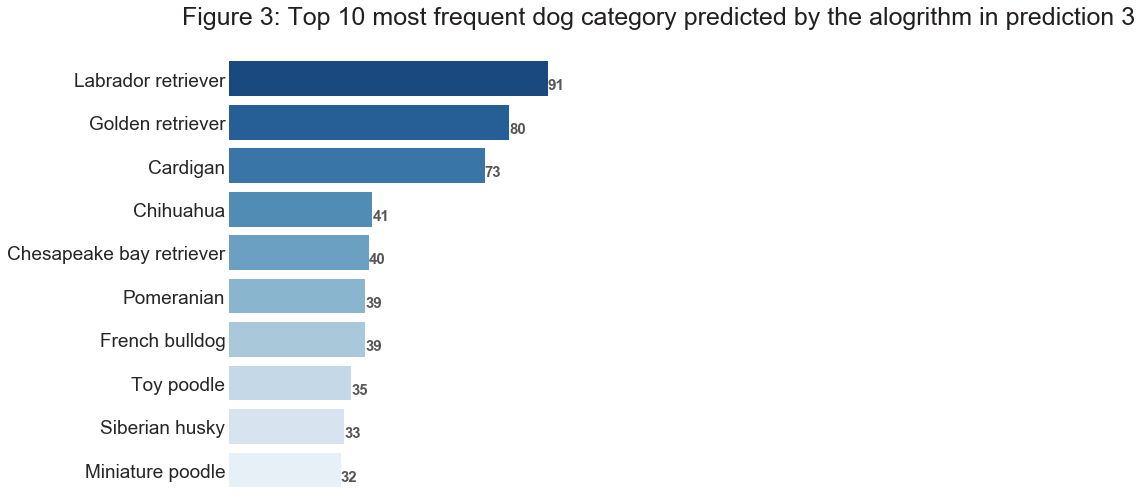

In [42]:
#plot, annotate and show figure
sns.set_style("whitegrid", {'axes.grid' : False})
ax = plt.figure(figsize = [6, 8])
data = most_common_p3    # data underlying bar plot in question
pal = sns.color_palette("Blues", len(data))
rank = most_common_p3.index   
sns.barplot(x= most_common_p3['number'], y= most_common_p3['dog_genre'], data= most_common_p3, palette=np.array(pal[::-1])[rank])

#lables-empty
plt.ylabel("")
plt.xlabel("")
plt.yticks(fontsize=19)
plt.title('Figure 3: Top 10 most frequent dog category predicted by the alogrithm in prediction 3\n',fontsize=25,loc="left", color = GRAY1, x=-0.14)

#remove borders
sns.despine(bottom=True, left=True, top=True)


#title
for i, v in enumerate(most_common_p3['number']):
    plt.text(v, i + .25, str(v), color=GRAY3, fontsize = 15, fontweight='bold')

#turns off major and minor ticks and removes the labels from the x-axis.
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.savefig('Figure_3.png', format='png')
sns.despine(bottom=True, left=True)
plt.show()

## Observations

**In this analysis we only focus on people who are 66 years or younger. The following can be observed from the box plots:**

**1.** Golden retriever is the most common dog genre predicted by the algorithm in the first instance.

**2.** Labrador retriever is considered as the second most common category by the algorithm.

**3.** Most popular categories are common in predic 1, 2 and 3 with diffrent frequency.

### 7.2  Most frequent dog stages


In [25]:
df_stages = df_master.stages.value_counts().rename_axis('dog_stage').reset_index(name='number')
df_stages = df_stages.drop(0)
df_stages

,dog_stage,number
1,pupper,202
2,doggo,63
3,puppo,22
4,floofer,7


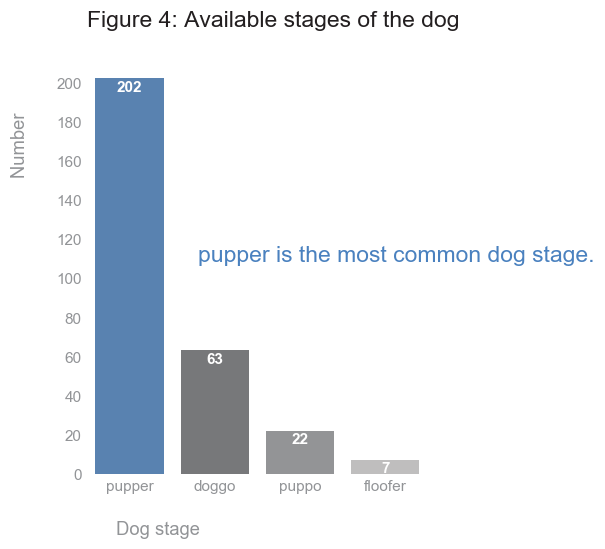

In [26]:
#chosing colors 
clrs = [BLUE2, GRAY5, GRAY7, GRAY9]

#plotting the figure
plt.figure(figsize = [4, 5], dpi=110)
ax = sns.barplot(x=df_stages['dog_stage'], y= df_stages['number'], palette=clrs)


# x and y tick labels
plt.yticks(np.arange(0, 210, 20), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

# x and y data labels and title
plt.xlabel(" \n Dog stage",fontsize=12,color=GRAY7, x=0.2)
plt.ylabel("Number \n",fontsize=12,color=GRAY7, y=0.8)
plt.title('Figure 4: Available stages of the dog\n',fontsize=15,loc="left", color=GRAY1, y=1.0)

plt.text(0.8, 95,'pupper is the most common dog stage.\n', fontsize=15, color=BLUE2, linespacing=1.4)


# get the values to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.0f}".format(y_value) # Use Y value as label and format number with two decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=10, color= 'white',fontweight='bold')

plt.savefig('Figure_4.png', format='png')
sns.despine(bottom=True, left=True)
plt.show()

## Observations

**For most of the tweet the stage information is not available. Here we have just focused on the tweets with an available stage name.:**

**1.** Pupper is the most frequent stage.

**2.** Floofer is the least frequent stage.

### 7.3  Time- year, month and time of tweet

In [27]:
df_tweet_year = df_master.year.value_counts()/df_master.year.value_counts().sum()*100
df_tweet_year = df_tweet_year.rename_axis('year').reset_index(name='percentage').sort_values('year', ascending=False)
df_tweet_year

,year,percentage
2,2017,18.028601
0,2016,48.416752
1,2015,33.554648


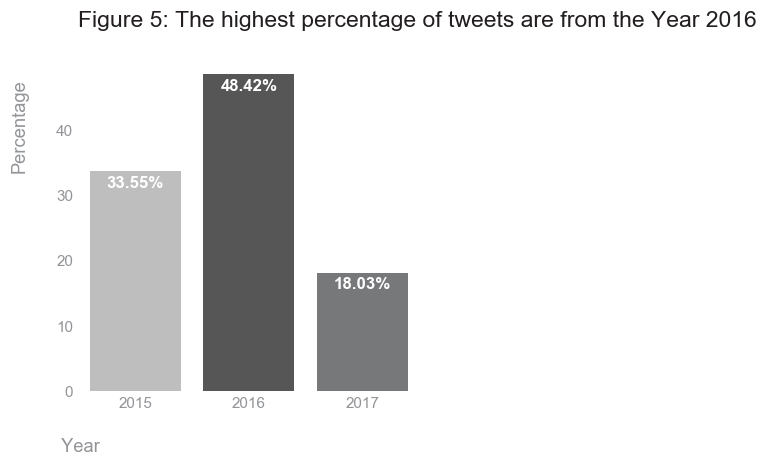

In [43]:
#chosing colors 
clrs = [GRAY9,GRAY3,GRAY5]

#plotting the figure
plt.figure(figsize = [4, 4], dpi=110)
ax = sns.barplot(x=df_tweet_year['year'], y= df_tweet_year['percentage'], palette=clrs)

# x and y tick labels
plt.yticks(np.arange(0, 50, 10), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

# x and y data labels and title
plt.xlabel(" \n Year",fontsize=12,color=GRAY7, x=0)
plt.ylabel("Percentage\n",fontsize=12,color=GRAY7, y=0.8)
plt.title('Figure 5: The highest percentage of tweets are from the Year 2016\n',fontsize=15,loc="left", color=GRAY1, y=1.0)

#plt.text(0.8, 95,'pupper is the most common dog stage.\n', fontsize=11, color=BLUE2, linespacing=1.4)


# get the values to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -12 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.2f}%".format(y_value) # Use Y value as label and format number with two decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=11, color= 'white',fontweight='bold')

plt.savefig('Figure_5.png', format='png')
sns.despine(bottom=True, left=True)
plt.show()
    

In [29]:
df_2016 = df_master.query('year == 2016')
df_2016.head(3)

,tweet_id,rating_numerator,rating_denominator,name,year,day,month,hour,stages,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
353,814986499976527872,11,10,Cooper,2016,Sat,Dec,0,pupper,Dalmatian,0.999828,True,Boxer,0.000068,True,Boxer,0.000034,True,8135,1413
354,814638523311648768,12,10,Olivia,2016,Fri,Dec,1,None,Golden retriever,0.650814,True,Kuvasz,0.053281,True,Kuvasz,0.035440,True,12007,2963
355,814530161257443328,12,10,Alf,2016,Thu,Dec,17,None,Miniature poodle,0.626913,True,Toy poodle,0.265582,True,Toy poodle,0.041614,True,9228,2031


In [30]:
#Declaring index for the Month- Starting from nov 2017 to Ot 2018
new_index_month = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']

In [31]:
df_2016_tweet_per_month = df_2016['month'].value_counts()/df_2016['month'].value_counts().sum()*100

In [32]:
#percerntage of average journey per month - considering all the journeys as 100%
df_2016_tweet_per_month = df_2016_tweet_per_month.reindex(new_index_month)
df_2016_tweet_per_month = df_2016_tweet_per_month.rename_axis('Month').reset_index(name='percentage')
df_2016_tweet_per_month

,Month,percentage
0,Jan,17.510549
1,Feb,11.497890
2,Mar,12.341772
3,Apr,5.485232
4,May,5.801688
5,Jun,8.333333
6,Jul,8.755274
7,Aug,6.223629
8,Sep,6.540084
9,Oct,6.645570


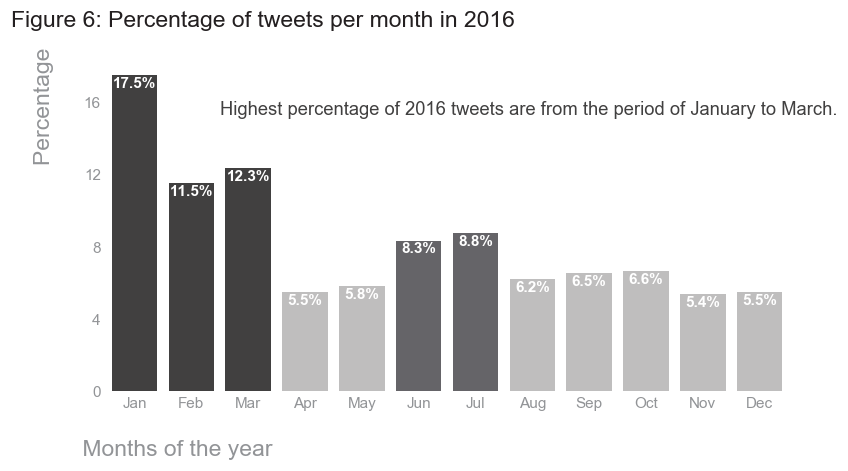

In [33]:
#delcaring clrs for assigning colors to the barplot bars
clrs = [GRAY2, GRAY2, GRAY2,GRAY9, GRAY9,GRAY4,GRAY4,GRAY9,GRAY9,GRAY9,GRAY9,GRAY9]

#figure size and barplot
plt.figure(figsize = [8, 4], dpi=110)
ax = sns.barplot(x=df_2016_tweet_per_month['Month'], y=df_2016_tweet_per_month['percentage'], palette=clrs)

y_data = pd.Series(df_2016_tweet_per_month['percentage'])
x_labels = df_2016_tweet_per_month['Month']
plt.yticks(np.arange(0, 20, 4.0), fontsize=10,color=GRAY7)
plt.xticks(fontsize=10,color=GRAY7)

#title, x and y labels
plt.xlabel(" \n Months of the year",fontsize=15,color=GRAY7, x=0.1)
plt.ylabel("Percentage \n",fontsize=15,color=GRAY7, y=0.87)
plt.title('Figure 6: Percentage of tweets per month in 2016\n',fontsize=15, color=GRAY1, x=0.23)

#adding notes
plt.text(1.5, 14, 'Highest percentage of 2016 tweets are from the period of January to March.\n', fontsize=12, color=GRAY2, linespacing=1.4)


# gets the value to annotate
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = -10 # Number of points between bar and label. 
    va = 'bottom' # Vertical alignment for positive values

    label = "{:.1f}%".format(y_value) # Use Y value as label and format number with one decimal place

    # Create annotation
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', 
                 va=va,fontsize=10, color= 'white',fontweight='bold')
    
#remove left and bottom border
sns.despine(bottom=True, left=True)
    

## Observations


**1.** Most of the tweets are from the year 2016 .

**2.** 41% tweets were done between Jan-Mar in 2016.

**3.** There is an increase in number during June and July after a brief quiet period in April and May.

In [34]:
df_2016_tweet_per_hour = df_2016.groupby(['hour']).size().reset_index(name='number_tweet')
df_2016_tweet_per_hour

,hour,number_tweet
0,0,121
1,1,146
2,2,107
3,3,66
4,4,29
5,5,6
6,6,1
7,14,3
8,15,54
9,16,90


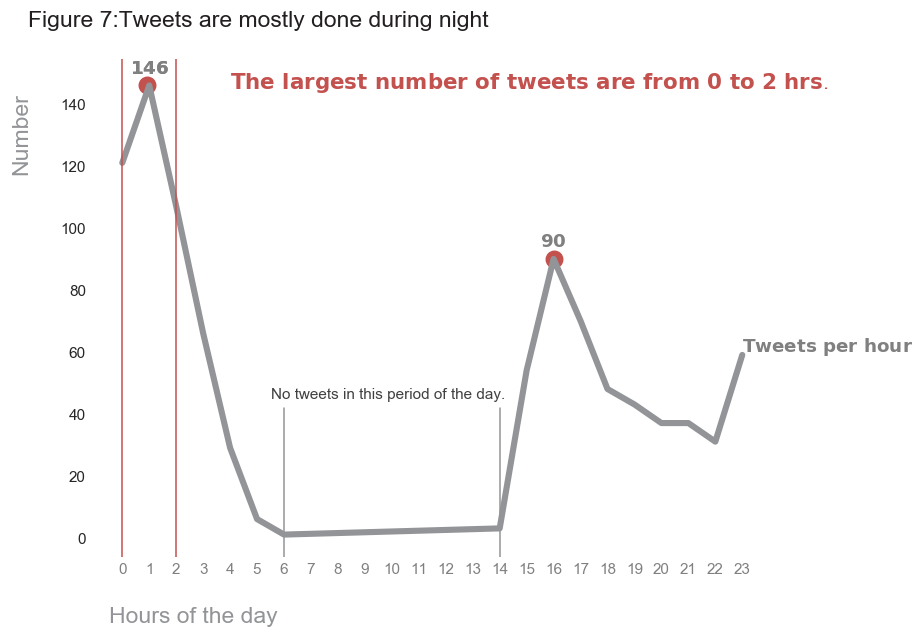

In [35]:
#Plotting customer per hour
plt.figure(figsize = [8, 6], dpi=110)
sns.set_style("whitegrid", {'axes.grid' : False})
plt.plot('hour','number_tweet', data=df_2016_tweet_per_hour, color = GRAY7, linewidth=4)



#Plotting the important values as scatterpoint to indicate importance
#plt.scatter(8, df_cus_per_hour['number_cus'][8], s=150, color=RED1, clip_on=False, linewidth=15)


# adding text levels
plt.text(.3,150, '$\\bf{146}$', fontsize='12', color='grey')
plt.scatter(.9,df_2016_tweet_per_hour['number_tweet'][1], s=60, color=RED1, clip_on=False, linewidth=4)


plt.text(15.5,94, '$\\bf{90}$', fontsize='12', color='grey')
plt.scatter(16,df_2016_tweet_per_hour['number_tweet'][9], s=60, color=RED1, clip_on=False, linewidth=4)


plt.text(.3,150, '$\\bf{146}$', fontsize='12', color='grey')

plt.text(23,60, '$\\bf{Tweets\ per\ hour}$', fontsize='12', color='grey')

#plotting text
plt.text(4, 145, '$\\bf{The\ largest\ number\ of\ tweets\ are\ from\ 0\ to\ 2\ hrs}$.', fontsize=14, color=RED1, linespacing=1.4)
plt.text(5.5, 45,'No tweets in this period of the day.', fontsize=10, color=GRAY2, linespacing=1.4)

#plot tile and labels
plt.title('Figure 7:Tweets are mostly done during night \n',fontsize=15, color=GRAY1, x=0.25,  y=1.0)
plt.xlabel("\nHours of the day",fontsize=15, color=GRAY7, x=0.15)
plt.ylabel("Number\n",fontsize=15, color=GRAY7, x=0, y=0.85)

plt.axvline(x=0, ymax=1, color=RED1, linewidth=1)
plt.axvline(x=2, ymax=1, color=RED1, linewidth=1)

plt.axvline(x=6, ymax=.3, color=GRAY7, linewidth=1)
plt.axvline(x=14, ymax=.3, color=GRAY7, linewidth=1)

plt.xticks(np.arange(0, 24, 1.0),fontsize=10, color ='grey')
#plt.yticks(np.arange(0, max(df_subscriber['start_hour'].value_counts())+10000, 10000.0),fontsize=40, color ='grey')


sns.despine(bottom=True, left=True)

#show plot
plt.show()

## Observations


**1.** Apparently, people prefer to do tweets during night.

**2.** 0-2 hours is the busiest period of the day while 6-14 is the quitest period.

**3.** Users start to be active again gradually from the 14 hours onward.



### 7.4. Popular Dog Names

In [36]:
#find the most popular names
df_popular_names = df_master.name.value_counts().rename_axis('Name').reset_index(name='instances')
df_popular_names.head(10)

,Name,instances
0,None,526
1,a,54
2,Charlie,10
3,Cooper,10
4,Oliver,10
5,Lucy,10
6,Penny,9
7,Tucker,9
8,Winston,8
9,Sadie,8


In [37]:
#dropping the first two rows- because None indicates missing data and a indiciates erroenous data
df_top_5 = df_popular_names.drop(df_popular_names.index[[0,1]]).head(10).reset_index(drop=True)
df_top_5

,Name,instances
0,Charlie,10
1,Cooper,10
2,Oliver,10
3,Lucy,10
4,Penny,9
5,Tucker,9
6,Winston,8
7,Sadie,8
8,Lola,7
9,the,7


## Observations


**1.** There is a big number of tweets with missing and erroneous names.

**2.** Cooper, Oliver and Lucy are the most poupar dog names.


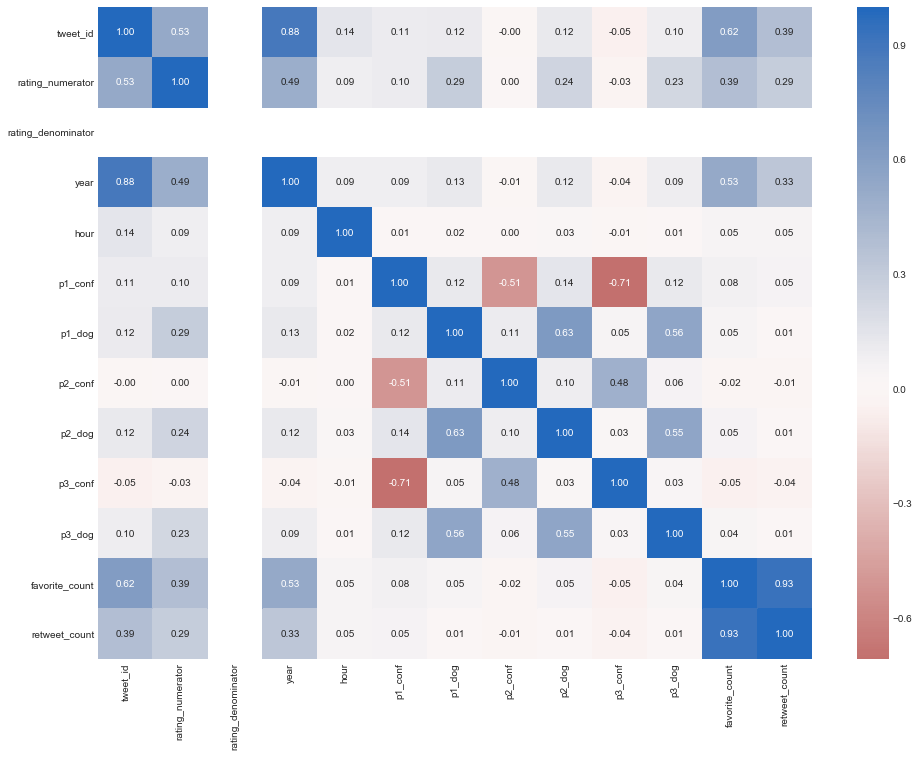

In [38]:
## Correlatin Matrix between various variables 
plt.figure(figsize = [16, 12])
sns.heatmap(df_master.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

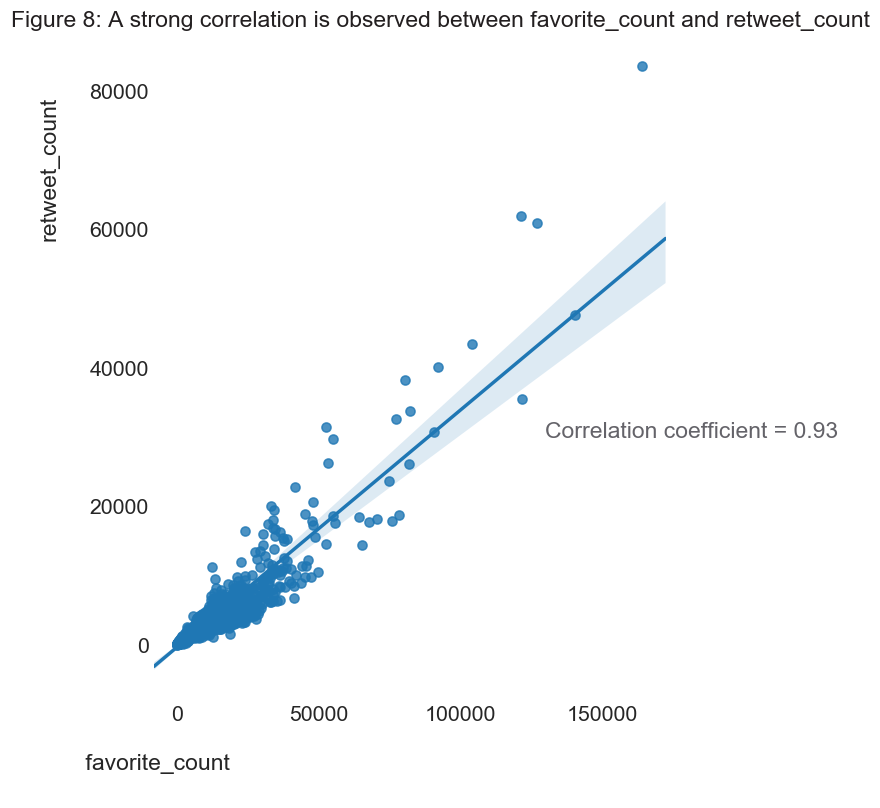

In [41]:
plt.figure(figsize = [6, 8], dpi=110)
sns.regplot(data = df_master, x = 'favorite_count', y = 'retweet_count')
plt.title('Figure 8: A strong correlation is observed between favorite_count and retweet_count',fontsize=15, color=GRAY1, x=0.56,  y=1.0)
plt.xlabel("\n favorite_count\n", fontsize=15, x=0)
plt.ylabel("retweet_count\n",fontsize=15, y=0.8)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
sns.despine(bottom=True, left=True)
plt.text(130e3, 3e4,'Correlation coefficient = 0.93', fontsize=15, color=GRAY4, linespacing=1.4)

#show plot
plt.show()

## Observations


**1.** From the correlation table- we can observe several moderate and strong corerlaiton factors between variables.

**2.** The strongest meangiful correlation is observed between favorite_count and retweet_count.

**3.** Also there is a strong negative correlation between the p_1 confidence and p_3 confidence.



Ref:https://github.com/empathy87/storytelling-with-data

### 8. Tidy master dataset in CSV format

In [40]:
# Store cleaned master data in a csv format
df_master.to_csv('df_master_clean.csv')